In [1]:
import numpy as np
import h5py
import pandas as pd
from itertools import islice
from collections import Counter
import re
from itertools import islice
from collections import Counter
from io import BytesIO
import matplotlib.pyplot as plt
import scipy
from scipy import stats

## Читаем перекрестные таблицы

In [2]:
dee = pd.read_csv('dee_cross.csv')
exp = pd.read_csv('exp_cross.csv')
dee2=dee.drop(columns = ['ensemble','symbol'],axis = 1)
exp2=exp.drop(columns = ['ensemble','symbol'],axis = 1)

## Ищем корреляции по колонкам (сэмплам)

In [3]:
corr=exp2.corrwith(dee2, axis=0, drop=False, method='spearman')
print(corr.head())
print(corr.tail())
print(len(corr))


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


Unnamed: 0    0.030345
GSM1026888    0.338464
GSM1026889    0.335852
GSM1026890    0.339139
GSM1026891    0.340498
dtype: float64
GSM951565    0.327406
GSM951566    0.334277
GSM951567    0.327012
GSM951568    0.315973
GSM988446    0.232369
dtype: float64
5180


# Check correlation for 1 column

In [4]:
dee3=dee2.head(1000)
exp3=exp2.head(1000)

In [9]:
res = stats.spearmanr(exp3['GSM1026902'], dee3['GSM1026902'], axis=0, alternative='two-sided')

In [10]:
res

SpearmanrResult(correlation=0.0514606717897687, pvalue=0.10387061631475945)

### Проверим, что за гео соответствуют низким уровням корреляции

In [38]:
check=corr.index [corr<0.15 ]. tolist () # check contain list of geo


In [39]:
print(check[0:10])

['Unnamed: 0', 'GSM1509357', 'GSM1565359', 'GSM1565360', 'GSM1565361', 'GSM1565362', 'GSM1565363', 'GSM1565364', 'GSM1565365', 'GSM1565366']


In [42]:
table=pd.read_csv('table.csv')
small_val=table.loc[table['geo_accession']. isin(check)] #df contain rows with geo from check
print(len(small_val))


465


In [41]:
small_val_count=small_val['data_processing'].value_counts()
print(small_val_count.head(50))

b'Illumina Casava 1.8.2 software used for basecalling.\tReads were decoded based on their barcodes. Read quality was evaluated using FastQC.\tReads were mapped to the reference genome (mouse mm10) using Array Studio allowing one mismatch.\tGenome_build: mm10\tSupplementary_files_format_and_content: tab-delimited text files include RPKM values for each sample'                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

**And list of geo with correlation more than 0.15**

In [5]:
anticheck=corr.index [corr>=0.15 ]. tolist () # anticheck contain list of geo

In [7]:
anticheck[0:20]

['GSM1026888',
 'GSM1026889',
 'GSM1026890',
 'GSM1026891',
 'GSM1026892',
 'GSM1026893',
 'GSM1026894',
 'GSM1026895',
 'GSM1026896',
 'GSM1026897',
 'GSM1026898',
 'GSM1026899',
 'GSM1026900',
 'GSM1026901',
 'GSM1026902',
 'GSM1026903',
 'GSM1026904',
 'GSM1026905',
 'GSM1026906',
 'GSM1026907']

In [35]:
high_val=table.loc[table['geo_accession']. isin(anticheck)] #df contain rows with geo from check

In [36]:
print(len(high_val)) # number of rows with geo from check

4713


In [43]:
high_val_count=high_val['data_processing'].value_counts()
print(high_val_count.head(5))
print(len(high_val_count))

b'RNA-seq fastq files were aligned to the mouse genome using Tophat v1.3.3 with the following options: -p 4 -a 8 -m 0 -i 70 -I 500000 -g 1 --library-type fr-firststrand --no-novel-indels --coverage-search --min-coverage-intron 50 --max-coverage-intron 20000 --no-closure-search --initial-read-mismatches 2 --segment-mismatches 2 --s. Only uniquely mapped reads were kept for downstream analysis.\tAll aligned reads were imported to SeqMonk. The mRNA expression was calculated by totaling all uniquely aligned exonic reads. The raw reads were converted to RPKM by dividing the reads by the cDNA length and the total number of uniquely mapped reads in the sample.\tBedgraph files were generated from aligned BAM files using the Bedtools suite: genomeCoverageBed -bg -split, using the mouse mm9 reference genome.\tGenome_build: mm9\tSupplementary_files_format_and_content: bedgraph files for each sample represent the read coverage at each genomic position.'                                             

**А сколько строк с Illumina Casava 1.8.2 в списке с гео с высокой корреляцией?**

In [46]:
print(len(high_val[high_val['data_processing'].str.contains('Illumina Casava 1.8.2')]))

6


**Only 6!!!**

### Теперь тоже самое сделаем для колонки extract_protocol

In [48]:
print(small_val['extract_protocol_ch1'].head(50))

4620     b'Wildtype macrophages were flowed into a C1 I...
6692     b'Primary splenocytes were isolated from 6-8 w...
6748     b'Primary splenocytes were isolated from 6-8 w...
8594     b'Primary splenocytes were isolated from 6-8 w...
11075    b'Primary splenocytes were isolated from 6-8 w...
11474    b'Primary splenocytes were isolated from 6-8 w...
11832    b'Primary splenocytes were isolated from 6-8 w...
19659    b'Primary splenocytes were isolated from 6-8 w...
23575    b'Primary splenocytes were isolated from 6-8 w...
23747    b'Wildtype macrophages were flowed into a C1 I...
29371    b'Primary splenocytes were isolated from 6-8 w...
30733    b'Na\xc3\xafve resting B cells from splenocyte...
34593    b'Wildtype macrophages were flowed into a C1 I...
35478    b'Total RNA was isolated from using RNAeasy Mi...
37356    b'Monocyte-derived macrophages isolated from i...
38501    b'Monocyte-derived macrophages isolated from i...
38647    b'Monocyte-derived macrophages isolated from i.

In [51]:
small_val_extr=small_val['extract_protocol_ch1'].value_counts()
print(small_val_extr.head(5))



b'Single islet cells were captured with C1 Integrated Fluidic Circuit. Cell lysing, reverse transcription and cDNA amplification were performed on the C1 Single-Cell Auto Prep IFC, as specified by the manufacturer (Protocol #100-7168 E1). The SMARTer Ultra Low RNA Kit (Clontech) was used for cDNA synthesis from the single cells.\tIllumina NGS library was constructed with Nextera XT DNA Sample Prep kit (Illumina), according to the manufacturer\xe2\x80\x99s recommendations (Protocol #100-7168 E1).'                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [52]:
high_val_extr=high_val['extract_protocol_ch1'].value_counts()
print(high_val_extr.head(5))

b"total RNA was biochemically purified as previously described (Bhatt et al, Cell 2012). Cells were resuspended in TriReagent and RNAs were purified using Rneasy columns (Qiagen).\tAll mRNA libraries were generated using the Illumina Truseq v.2 kit with a few modifications: strand specific libraries were generated using the dUTP method. Briefly, the second strand cDNA was synthesized in the presence of dUTP. Prior to library amplification, the second strand was degraded with dUTPase. Few libraries were genearted using TruSeq Stranded mRNA Library Prep  Kit as per manufacturere's instructions."                                                                                                                                                                                                                                                                                                                                                                            244
b'After treatment, cells were im

In [53]:
print(len(high_val[high_val['extract_protocol_ch1'].str.contains('C1 Integrated Fluidic Circuit')]))

0


**Как видим, много сэмплов с низкой корреляцией имеют протокол экстракции C1 Integrated Fluidic Circuit**\
**Однако ни одного сэмпла с таким протоколом экстракции нет среди сэмплов с высокой корреляцией**

## Построим гистограмму корреляций по сэмплам

(array([  1.,   0.,   0.,   3.,   6.,  10.,  12.,  32.,  32.,  32.,  43.,
         44.,  36.,  26.,  33.,  34.,  31.,  22.,  24.,   8.,  10.,  10.,
          4.,   3.,   2.,   3.,   4.,   0.,   4.,   4.,  10.,   2.,   7.,
          5.,   6.,   4.,   3.,   7.,   6.,   3.,   9.,   7.,  16.,  10.,
         16.,  22.,  28.,  27.,  18.,  20.,  27.,  40.,  31.,  56.,  43.,
         64.,  75.,  83., 118., 116., 131., 167., 189., 240., 219., 220.,
        218., 218., 241., 231., 208., 200., 191., 165., 160., 156., 128.,
         76.,  59.,  48.,  51.,  40.,  51.,  33.,  34.,  22.,   8.,  17.,
         14.,  15.,  11.,  10.,  14.,   7.,   6.,  10.,   9.,   4.,   3.,
          3.]),
 array([0.01161909, 0.0163517 , 0.0210843 , 0.02581691, 0.03054952,
        0.03528212, 0.04001473, 0.04474734, 0.04947994, 0.05421255,
        0.05894516, 0.06367776, 0.06841037, 0.07314297, 0.07787558,
        0.08260819, 0.08734079, 0.0920734 , 0.09680601, 0.10153861,
        0.10627122, 0.11100383, 0.11573643, 0.

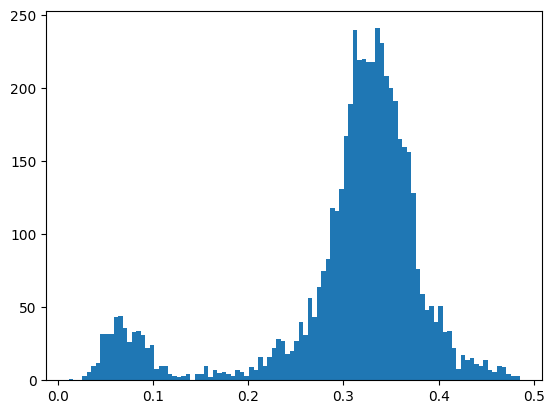

In [11]:
plt.hist(corr, bins=100)

### Корреляция по генам

In [32]:
corr2=exp2.corrwith(dee2, axis=1, drop=False, method='spearman')
print(corr2.head())
print(corr2.tail())
print(len(corr2))

0    0.924796
1    0.718730
2    0.932008
3    0.897295
4    0.774107
dtype: float64
31659   NaN
31660   NaN
31661   NaN
31662   NaN
31663   NaN
dtype: float64
31664


(array([1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 4.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 5.000e+00, 5.000e+00,
        4.000e+00, 3.000e+00, 6.000e+00, 6.000e+00, 1.200e+01, 1.100e+01,
        2.400e+01, 2.300e+01, 5.600e+01, 1.230e+02, 2.120e+02, 3.760e+02,
        4.690e+02, 7.350e+02, 9.700e+02, 1.316e+03, 1.423e+03, 1.378e+03,
        1.344e+03, 1.265e+03, 1.210e+03, 1.234e+03, 1.099e+03, 1.007e+03,
        9.850e+02, 8.920e+02, 8.270e+02, 8.270e+02, 7.020e+02, 7.190e+02,
        6.740e+02, 6.050e+02, 5.690e+02, 5.410e+02, 5.080e+02, 5.160e+02,
        4.290e+02, 4.430e+02, 3.600e+02, 3.370e+02, 3.420e+02, 2.880e+02,
        3.270e+02, 2.930e+02, 2.780e+02, 2.460e+02, 2.520e+02, 2.370e+02,
        2.380e+02, 1.950e+02, 2.240e+02, 2.300e+02, 2.280e+02, 1.930e+02,
        1.980e+02, 1.800e+02, 2.210e+02, 2.300e+02, 2.060e+02, 1.980e+02,
        2.110e+02, 2.130e+02, 2.270e+02, 1.980e+02, 1.950e+02, 2.220e+02,
        2.120e+02, 2.000e+02, 1.820e+0

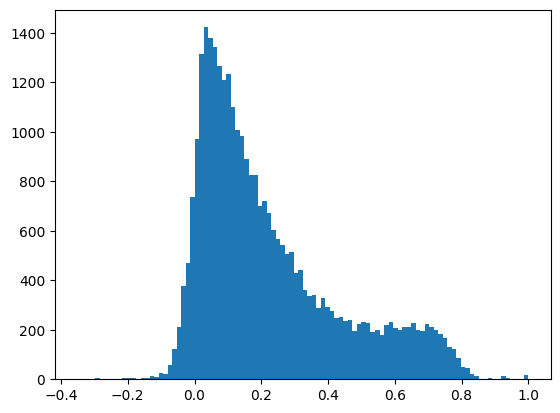

In [33]:
plt.hist(corr2, bins=100)

### Ищем корреляцию по группам


In [3]:
gt=pd.read_csv('great_table2.csv')

In [4]:
print(gt.head())

   Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0 geo_accession platform_id Cell_type  \
0             0             0          28    GSM1849922    GPL13112   B_cells   
1             1             1          38    GSM1897413    GPL13112   B_cells   
2             2             2         334    GSM1849954    GPL13112   B_cells   
3             3             3         341    GSM1229014    GPL13112   B_cells   
4             4             4         570    GSM1234739    GPL13112   B_cells   

              Classes     source_name_ch1  
0       other B-cells         Pro B cells  
1  Follicular B cells  Follicular B cells  
2       other B-cells         B1A B cells  
3       other B-cells     Dnmt-KO B-Cells  
4     Primary B cells     Primary B-cells  


In [39]:
def corr_cell_type(typ):
    typ=gt.loc[gt['Cell_type'] == typ]
    typ_geo=typ['geo_accession'].values.tolist()
    exp_typ=exp2.loc[:, exp2.columns.intersection(typ_geo)]
    dee_typ=dee2.loc[:, dee2.columns.intersection(typ_geo)]
    corr_typ=exp_typ.corrwith(dee_typ, axis=0, drop=False, method='spearman')
    return plt.hist(corr_typ, bins=100)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


(array([ 2.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  2.,  0.,
         0.,  2.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
         1.,  0.,  1.,  2.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,
         0.,  2.,  2.,  5.,  5., 15.,  8.,  4.,  5.,  6.,  3.,  5., 15.,
        15., 24., 29., 27., 30., 31., 57., 43., 31., 45., 47., 46., 46.,
        37., 28., 36., 34., 29., 20., 27., 15., 15., 13.,  6.,  8.,  8.,
        12.,  3.,  5.,  1.,  0.,  1.,  2.,  1.,  3.,  1.,  1.,  0.,  1.,
         0.,  2.,  1.,  1.,  0.,  1.,  0.,  0.,  1.]),
 array([0.05111436, 0.05526663, 0.0594189 , 0.06357117, 0.06772344,
        0.07187572, 0.07602799, 0.08018026, 0.08433253, 0.0884848 ,
        0.09263708, 0.09678935, 0.10094162, 0.10509389, 0.10924616,
        0.11339844, 0.11755071, 0.12170298, 0.12585525, 0.13000752,
        0.13415979, 0.13831207, 0.14246434, 0.14661661, 0.15076888,
        0.15492115, 0.15907343, 0.1632257 , 0.16737797, 0.17153024,
        0.17568251, 0.1798

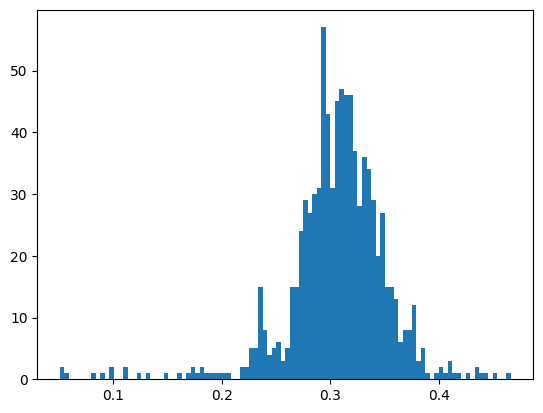

In [40]:
corr_cell_type('B_cells')

(array([ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  3.,  2.,  2.,  3.,  9.,
         2.,  2.,  1.,  1.,  2.,  3.,  2.,  4.,  0.,  2.,  4.,  1.,  0.,
         2.,  1.,  1.,  1.,  2.,  2.,  0.,  1.,  5.,  3.,  5.,  5.,  6.,
         6., 14.,  3., 13.,  6.,  7.,  4.,  6.,  8.,  7.,  7.,  8.,  7.,
        17., 20.,  6., 10.,  9.,  7.,  8.,  8.,  9.,  6.,  5.,  8.,  5.,
         5.,  7.,  2.,  8.,  2.,  3.,  5.,  1.,  2.,  4.,  0.,  1.,  0.,
         3.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,
         0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.]),
 array([0.19821023, 0.20030951, 0.2024088 , 0.20450808, 0.20660737,
        0.20870665, 0.21080594, 0.21290522, 0.21500451, 0.21710379,
        0.21920307, 0.22130236, 0.22340164, 0.22550093, 0.22760021,
        0.2296995 , 0.23179878, 0.23389807, 0.23599735, 0.23809664,
        0.24019592, 0.24229521, 0.24439449, 0.24649378, 0.24859306,
        0.25069235, 0.25279163, 0.25489092, 0.2569902 , 0.25908948,
        0.26118877, 0.2632

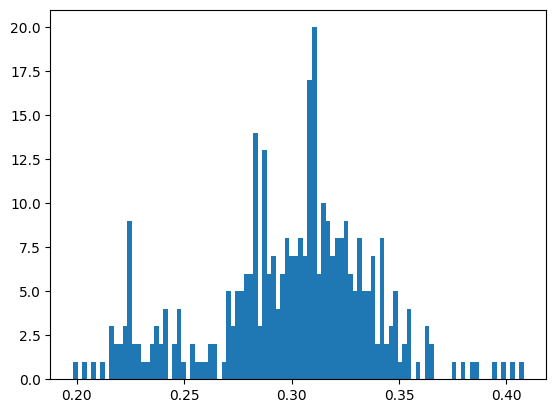

In [41]:
corr_cell_type('T_cells')

(array([  2.,   0.,   4.,   1.,   7.,   4.,  14.,  23.,  28.,  35.,  52.,
         37.,  41.,  46.,  33.,  25.,  14.,  20.,  19.,  17.,   6.,   5.,
          6.,   4.,   4.,   2.,   3.,   1.,   2.,   6.,   3.,   8.,   3.,
          3.,   3.,   4.,   4.,   3.,   4.,   3.,   4.,   2.,   5.,   5.,
          3.,   3.,   9.,   9.,   9.,  13.,  18.,  18.,  22.,  16.,  12.,
         13.,  17.,  19.,  29.,  55.,  65.,  70., 115., 148., 173., 161.,
        180., 164., 174., 204., 208., 192., 175., 157., 148., 157., 117.,
         90.,  54.,  60.,  43.,  34.,  54.,  46.,  29.,  21.,  14.,  15.,
          9.,  18.,   6.,  14.,  11.,   6.,   9.,   4.,  12.,   4.,   2.,
          3.]),
 array([0.01580303, 0.02053875, 0.02527447, 0.0300102 , 0.03474592,
        0.03948164, 0.04421736, 0.04895308, 0.05368881, 0.05842453,
        0.06316025, 0.06789597, 0.0726317 , 0.07736742, 0.08210314,
        0.08683886, 0.09157458, 0.09631031, 0.10104603, 0.10578175,
        0.11051747, 0.1152532 , 0.11998892, 0.

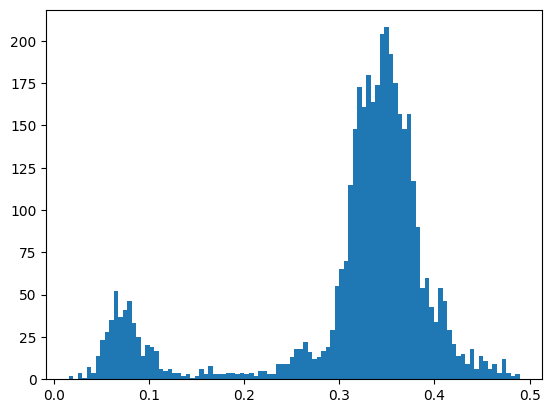

In [42]:
corr_cell_type('macrophage')

In [62]:
def corr_cell_class(cla):
    cl=gt.loc[gt['Classes'] == cla]
    cl_geo=cl['geo_accession'].values.tolist()
    exp_cl=exp2.loc[:, exp2.columns.intersection(cl_geo)]
    dee_cl=dee2.loc[:, dee2.columns.intersection(cl_geo)]
    corr_cl=exp_cl.corrwith(dee_cl, axis=0, drop=False, method='spearman')
    plt.hist(corr_cl, bins=100)
    return print(cla), plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


splenic B cells


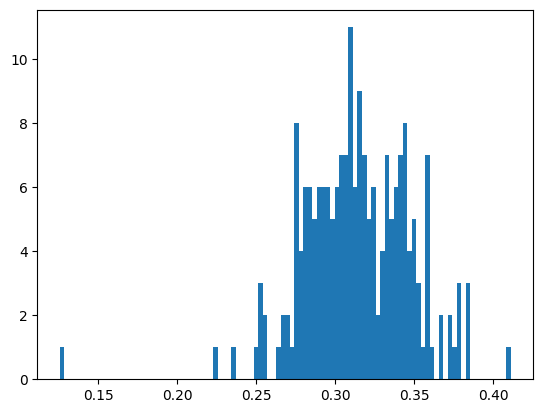

Germinal center B cells


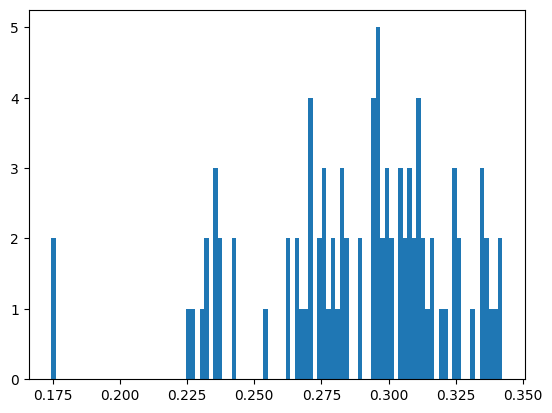

Marginal zone B cells


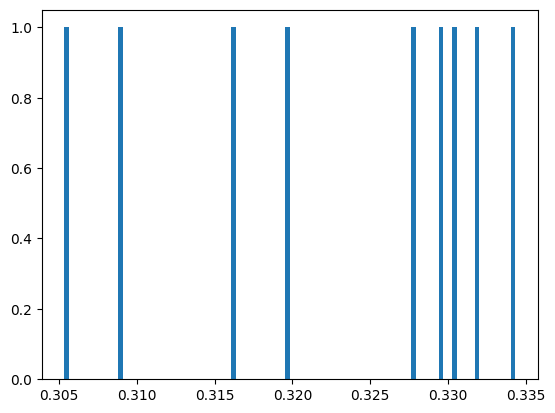

Follicular B cells


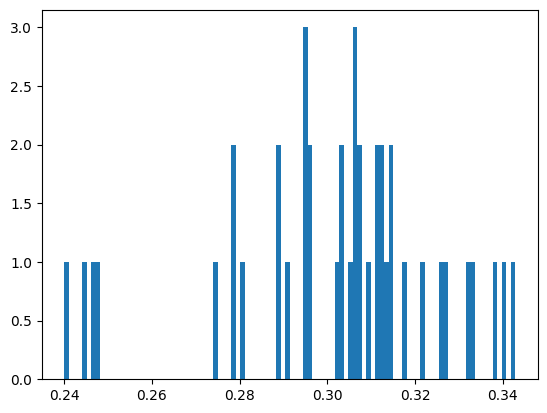

B220+ B cells


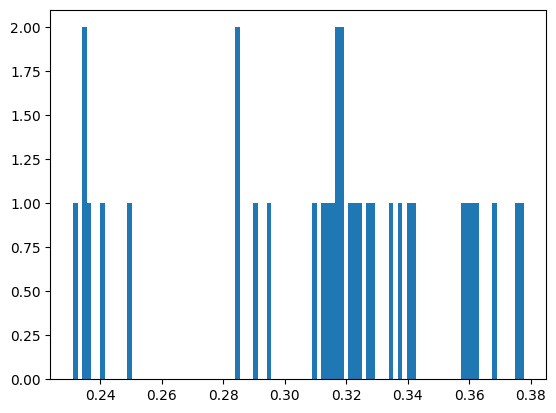

Primary B cells


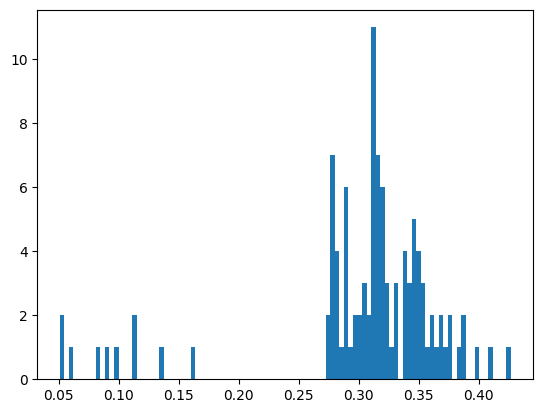

NP+ GC B cells


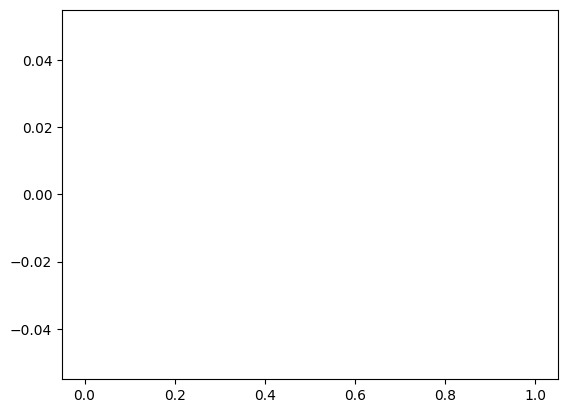

Immature B cells


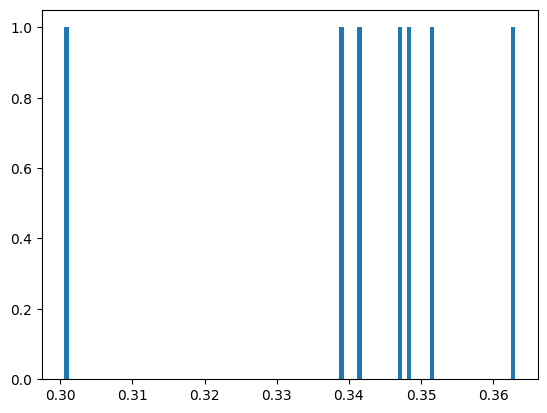

CH12 line


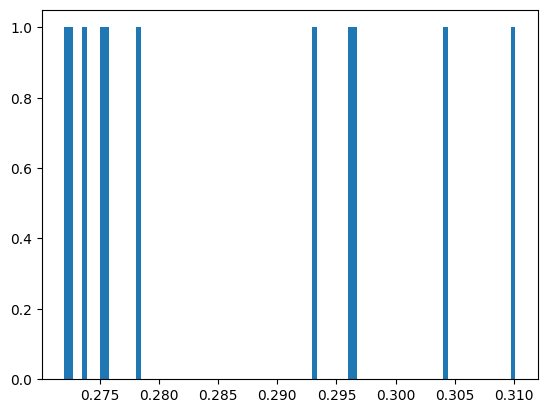

CD19+ B cells


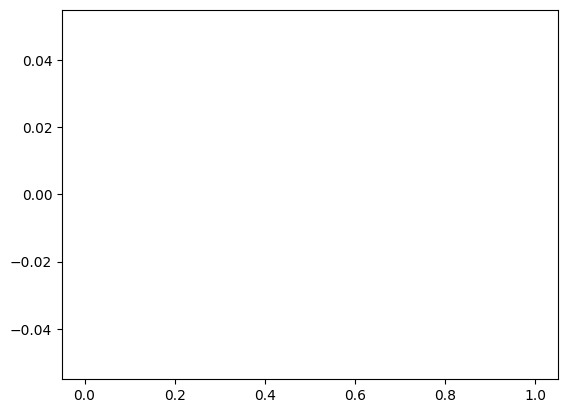

other B-cells


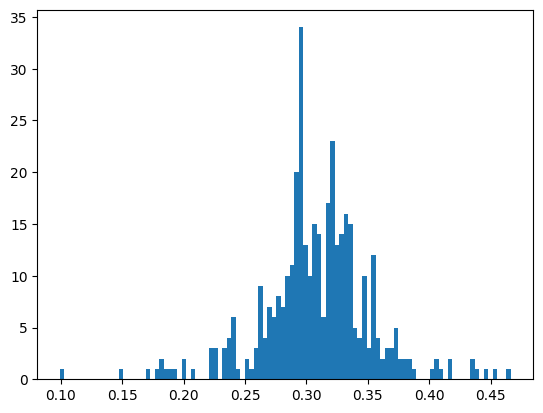

In [63]:
B_classes=['splenic B cells', 'Germinal center B cells', 'Marginal zone B cells', 'Follicular B cells', 'B220+ B cells','Primary B cells','NP+ GC B cells','Immature B cells','CH12 line','CD19+ B cells', 'other B-cells']
for i in B_classes:
    corr_cell_class(i)

CD8+ T cells


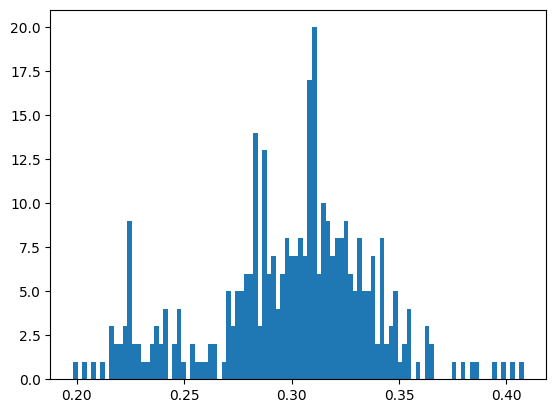

CD4+ T cells


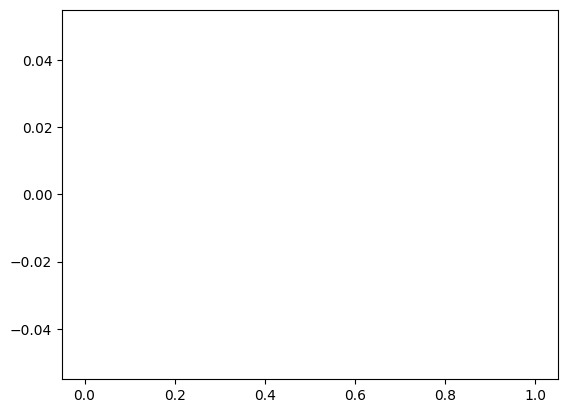

YFP+ T cells


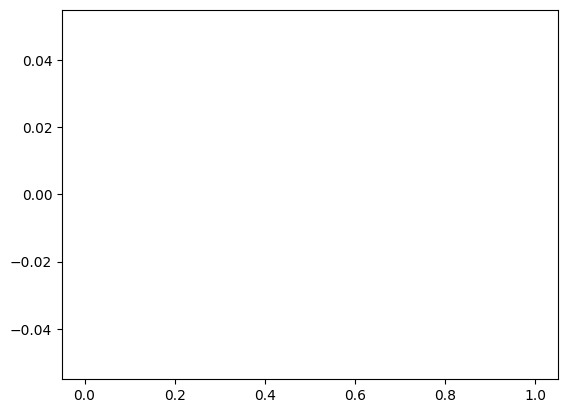

VÎ³4 T cell


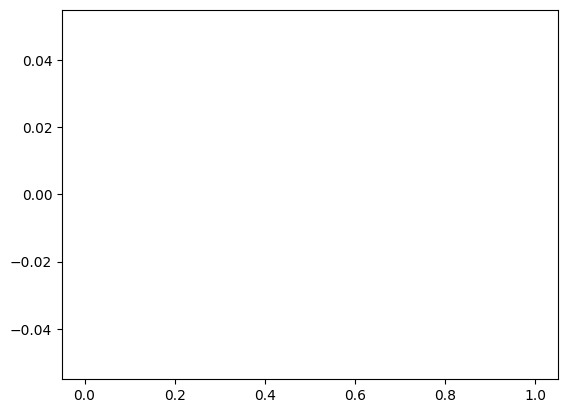

Tumor-infiltrating T cells


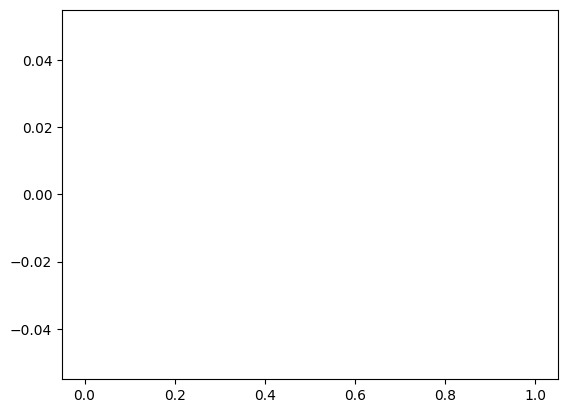

Thymus T cells


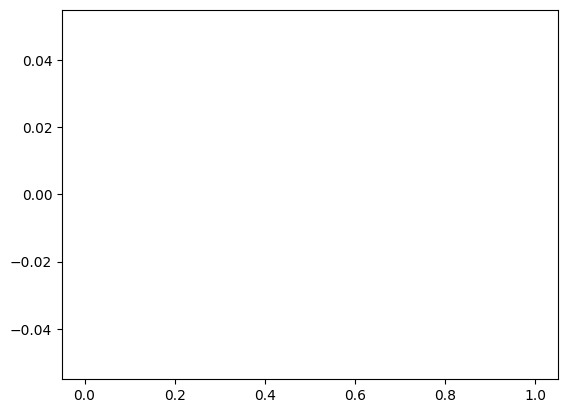

Splenic T cells


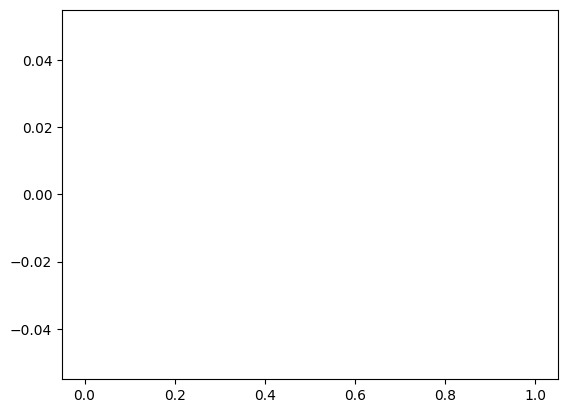

other T cells


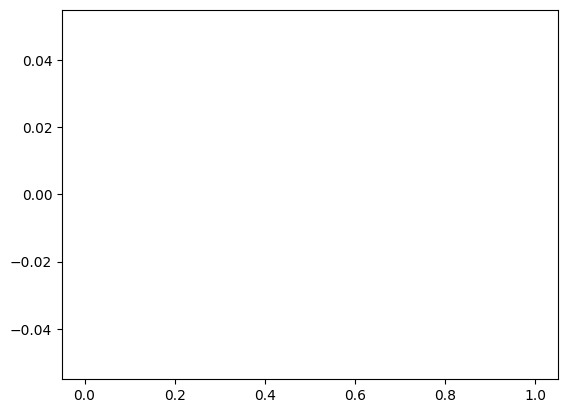

In [64]:
T_classes = ['CD8+ T cells', 'CD4+ T cells', 'YFP+ T cells','V\xce\xb34 T cell', 'Tumor-infiltrating T cells', 'Thymus T cells', 'Splenic T cells', 'other T cells']
for i in T_classes:
    corr_cell_class(i)

Bone Marrow Derived macrophages


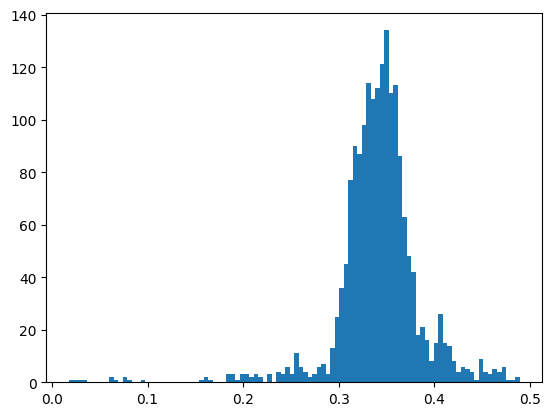

Peritoneal macrophage


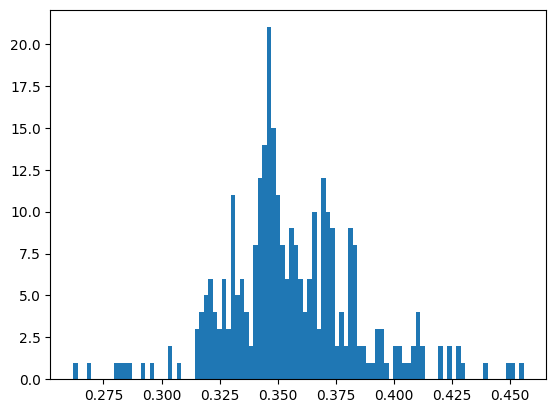

Alveolar macrophage


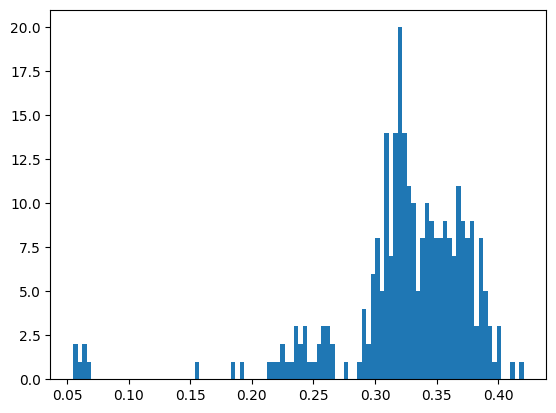

tumor macrophage


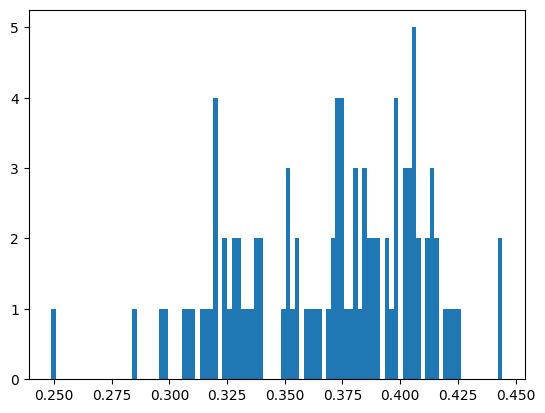

Splenic macrophages


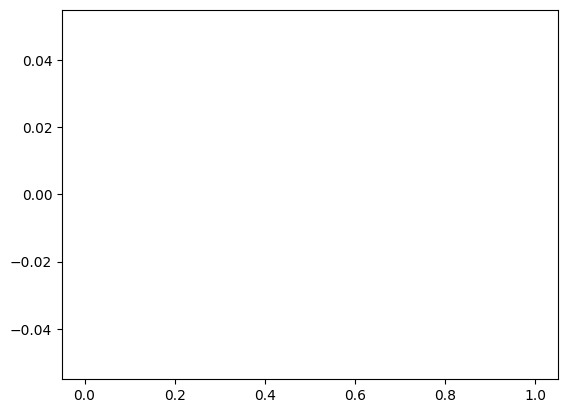

hepatic macrophages


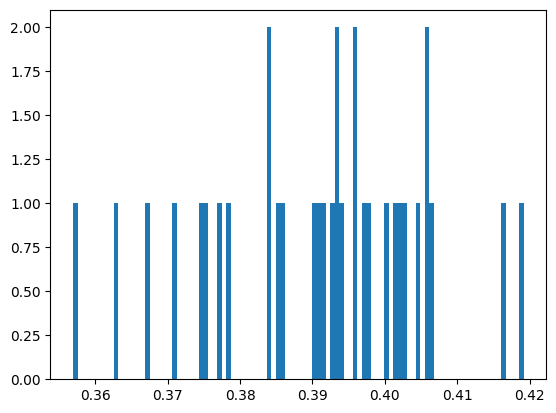

sciatic nerve macrophages


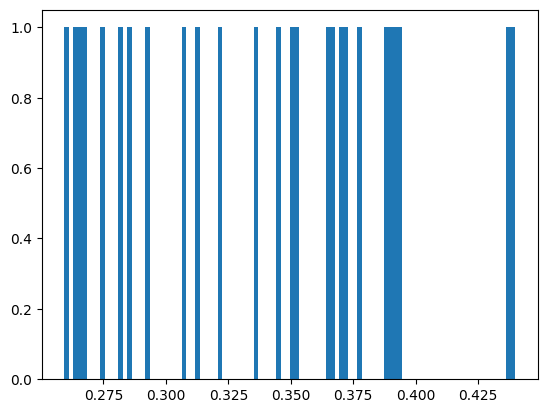

Phagocytic macrophages


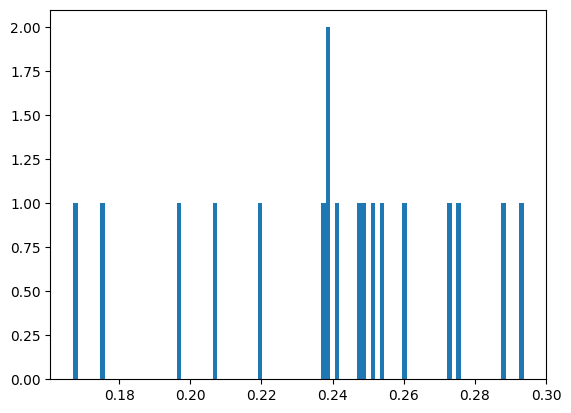

Peripheral macrophages


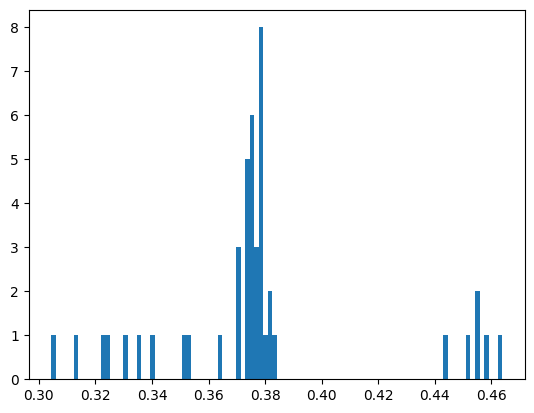

muscle macrophages


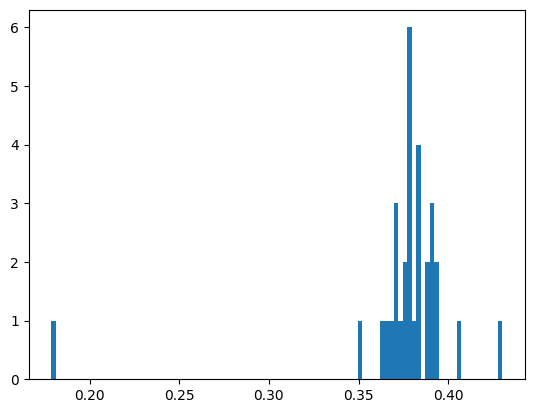

1 day after TBI macrophages


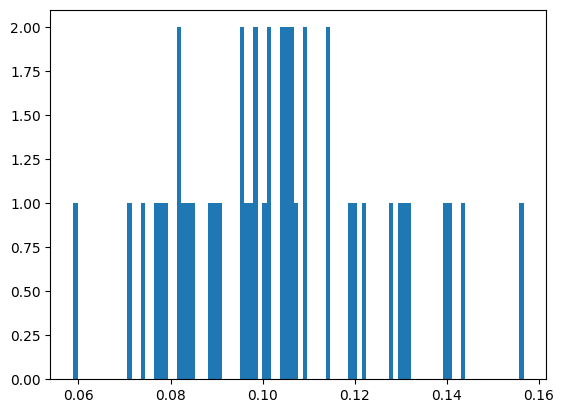

other macrophage


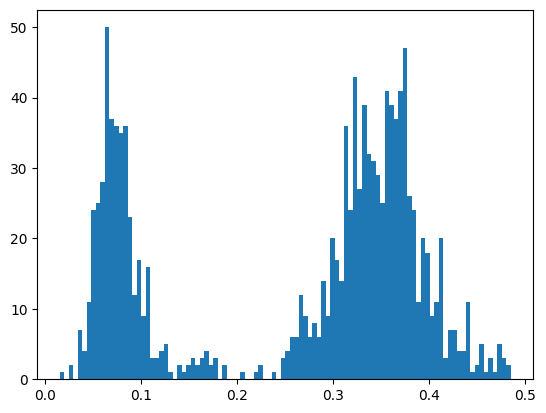

In [66]:
M_classes = ['Bone Marrow Derived macrophages', 'Peritoneal macrophage', 'Alveolar macrophage', 'tumor macrophage','Splenic macrophages','hepatic macrophages', 'sciatic nerve macrophages','Phagocytic macrophages', 'Peripheral macrophages','muscle macrophages','1 day after TBI macrophages', 'other macrophage']
for i in M_classes:
    corr_cell_class(i)

In [68]:
CD4=gt.loc[gt['Classes'] == 'CD4+ T cells']
CD4_geo=CD4['geo_accession'].values.tolist()
print(CD4_geo[0:10])
exp_CD4=exp2.loc[:, exp2.columns.intersection(CD4_geo)]
print(exp_CD4.head())
dee_CD4=dee2.loc[:, dee2.columns.intersection(CD4_geo)]
print(dee_CD4.head())    

['GSM1262088', 'GSM1511235', 'GSM1713923', 'GSM1703629', 'GSM1543815', 'GSM1601766', 'GSM1601747', 'GSM1262107', 'GSM1601752', 'GSM1543817']
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]
